In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from utils.inference import *

In [14]:
SAMPLE_IMG_PATH = './sample_img'

# Sample data

I download some random Cityscapes and Cityscapes-like images for inference example. <br>
* Any other Cityscapes-like images can been used.
* Images with any size can been used.

In [ ]:
# Random images with different size for a mask inference example.

! wget -O ./sample_img/sample_img_1.jpg https://people.ee.ethz.ch/~csakarid/Model_adaptation_SFSU_dense/images/Foggy_Cityscapes-DBF/dusseldorf_000132_000019_leftImg8bit_crop.png
! wget -O ./sample_img/sample_img_2.jpg https://people.ee.ethz.ch/~ihnatova/wespe/cityscapes/before_1.jpg
! wget -O ./sample_img/sample_img_3.jpg https://people.ee.ethz.ch/~ihnatova/wespe/cityscapes/after_2.jpg
! wget -O ./sample_img/sample_img_4.jpg https://miro.medium.com/max/3200/0*6s81tQ6lhogvPNjr
! wget -O ./sample_img/sample_img_5.jpg https://people.ee.ethz.ch/~csakarid/SFSU_synthetic/images/Foggy_Cityscapes/dusseldorf_000081_000019_leftImg8bit_foggy_beta_0.01.png
! wget -O ./sample_img/sample_img_6.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTj0jF-1ESQpzzPyud9IA8oQCAPx8ImZuXfw&usqp=CAU

# Models initialization

In [12]:
unet = TrainedModel('UNet')
resunet = TrainedModel('ResUNet')

Downloading: "https://github.com/kumgleb/SemanticSegmentation/releases/download/%23trained_unet/UNet_0.295.pth" to /root/.cache/torch/hub/checkpoints/UNet_0.295.pth


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Downloading: "https://github.com/kumgleb/SemanticSegmentation/releases/download/%23trained_resunet/ResUNet_0.192.pth" to /root/.cache/torch/hub/checkpoints/ResUNet_0.192.pth


# Inference example

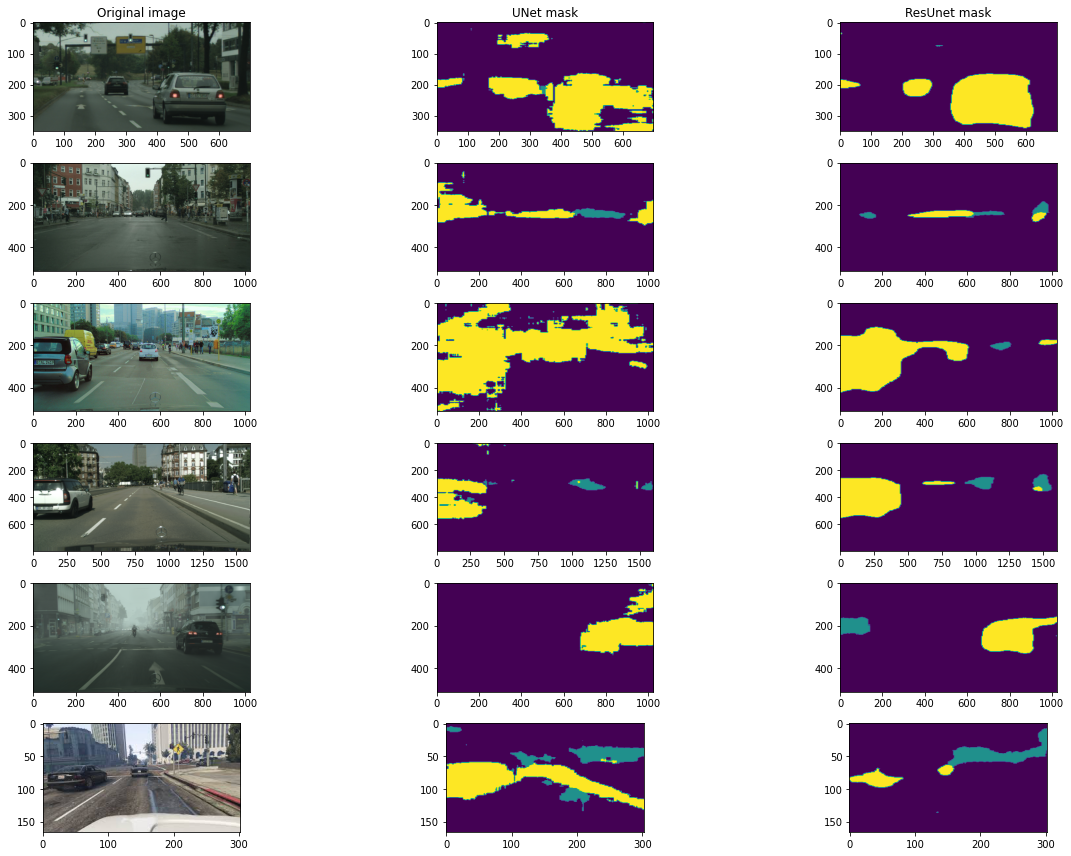

In [37]:
n_samples = len(os.listdir(SAMPLE_IMG_PATH))

fig, ax = plt.subplots(n_samples, 3, figsize=(18, 12))
for i in range(n_samples):
  sample_img_pth = os.path.join(SAMPLE_IMG_PATH, f'sample_img_{i+1}.jpg')
  sample_img = Image.open(sample_img_pth)

  unet_mask = unet.eval_mask(sample_img_pth)
  resunet_mask = resunet.eval_mask(sample_img_pth)

  ax[i][0].imshow(sample_img)
  ax[i][1].imshow(unet_mask)
  ax[i][2].imshow(resunet_mask)

ax[0][0].set_title('Original image')
ax[0][1].set_title('UNet mask')
ax[0][2].set_title('ResUnet mask')
fig.tight_layout()